In [41]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='aeaa8cb6-77b9-443f-973e-4a81b3bd5dbf', project_access_token='p-63a46a03b787292d533339c6c8b4234ca77ae910')
pc = project.project_context
from IPython.display import display,HTML
CSS = """
div.cell:nth-child(8) .output {
    flex-direction: row;
}
"""
HTML('<style>{}</style>'.format(CSS))

In [3]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_33bf8862041d4321bcfe6e538a570ef8 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Jk8Yqg8SNpzpZP23IUYAqy_Ek1JtnjprOjky2zUQhZub',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_33bf8862041d4321bcfe6e538a570ef8.get_object(Bucket='sdad-donotdelete-pr-bkkdo3o6wyebog',Key='heart_failure_clinical_records_dataset.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
data['age']=data['age'].round()

In [5]:
data_mati=data[data['DEATH_EVENT']==1]
data_hidup=data[data['DEATH_EVENT']==0]
data_mati.head()
data_hidup.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
14,49.0,1,80,0,30,1,427000.0,1.0,138,0,0,12,0
20,65.0,1,52,0,25,1,276000.0,1.3,137,0,0,16,0
23,53.0,0,63,1,60,0,368000.0,0.8,135,1,0,22,0
33,50.0,1,159,1,30,0,302000.0,1.2,138,0,0,29,0
38,60.0,0,2656,1,30,0,305000.0,2.3,137,1,0,30,0


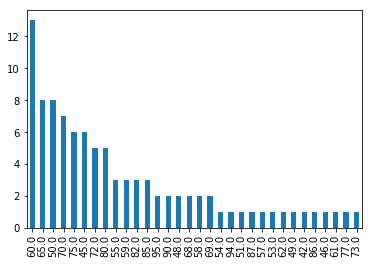

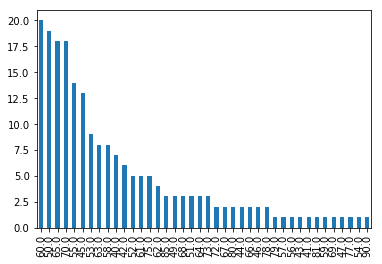

In [7]:
import matplotlib.pyplot as plt
data_mati['age'].value_counts().plot(kind='bar')
plt.show()
data_hidup['age'].value_counts().plot(kind='bar')
plt.show()

In [22]:
project.save_data("data_mati.csv", data_mati.to_csv(index=False))
project.save_data("data_bertahan.csv", data_hidup.to_csv(index=False))

{'file_name': 'data_bertahan.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'sdad-donotdelete-pr-bkkdo3o6wyebog',
 'asset_id': '8fa50997-9169-43fe-a46d-c58835e00191'}

In [9]:
datates=data.sort_values(by='age')
datates.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
269,40.0,0,582,1,35,0,222000.0,1.0,132,1,0,244,0
232,40.0,1,129,0,35,0,255000.0,0.9,137,1,0,209,0
180,40.0,0,478,1,30,0,303000.0,0.9,136,1,0,148,0
242,40.0,0,90,0,35,0,255000.0,1.1,136,1,1,212,0
248,40.0,0,624,0,35,0,301000.0,1.0,142,1,1,214,0


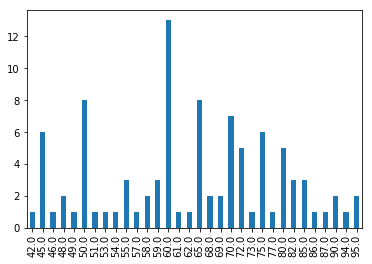

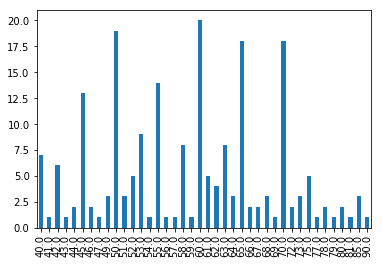

In [40]:
data_mati=datates[datates['DEATH_EVENT']==1]
data_hidup=datates[datates['DEATH_EVENT']==0]
data_mati['age'].value_counts().sort_index().plot(kind='bar')
plt.show()
data_hidup['age'].value_counts().sort_index().plot(kind='bar')
plt.show()

In [11]:
data_mati.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
66,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
194,45.0,0,582,0,20,1,126000.0,1.6,135,1,0,180,1
63,45.0,0,582,0,35,0,385000.0,1.0,145,1,0,61,1
60,45.0,0,7702,1,25,1,390000.0,1.0,139,1,0,60,1
164,45.0,0,2442,1,30,0,334000.0,1.1,139,1,0,129,1


In [12]:
data_mati.head(8)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
66,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
194,45.0,0,582,0,20,1,126000.0,1.6,135,1,0,180,1
63,45.0,0,582,0,35,0,385000.0,1.0,145,1,0,61,1
60,45.0,0,7702,1,25,1,390000.0,1.0,139,1,0,60,1
164,45.0,0,2442,1,30,0,334000.0,1.1,139,1,0,129,1
17,45.0,0,582,0,14,0,166000.0,0.8,127,1,0,14,1
12,45.0,1,981,0,30,0,136000.0,1.1,137,1,0,11,1
126,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1


In [17]:
data['age'].max()

95.0

In [28]:
data['age'].mode()

0    60.0
dtype: float64

In [33]:
datates['age'].value_counts().sort_index()

40.0     7
41.0     1
42.0     7
43.0     1
44.0     2
45.0    19
46.0     3
47.0     1
48.0     2
49.0     4
50.0    27
51.0     4
52.0     5
53.0    10
54.0     2
55.0    17
56.0     1
57.0     2
58.0    10
59.0     4
60.0    33
61.0     6
62.0     5
63.0     8
64.0     3
65.0    26
66.0     2
67.0     2
68.0     5
69.0     3
70.0    25
72.0     7
73.0     4
75.0    11
77.0     2
78.0     2
79.0     1
80.0     7
81.0     1
82.0     3
85.0     6
86.0     1
87.0     1
90.0     3
94.0     1
95.0     2
Name: age, dtype: int64